# Práctica 10. Espacios de color

<div class="alert alert-block alert-success">
<b>Resumen:</b> Este notebook explora diferentes espacios de color utilizados en procesamiento digital de imágenes, tales como RGB, HSV, LAB y escala de grises. Se presentan técnicas para la manipulación de imágenes en estos espacios, así como visualizaciones en 2D y 3D de los componentes de color. La práctica tiene como objetivo proporcionar una comprensión profunda de cómo se representan y transforman los colores en imágenes digitales.
</div>

***

In [18]:
# Importar las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<b>Cargar la imagen de prueba</b>

Se carga la imagen de prueba coloredChips.png utilizando la función `cv2.imread`, que permite leer la imagen en su formato BGR, el cual es estándar en OpenCV.

In [19]:
im_1 = cv2.imread('./images/coloredChips.png')

## 1. Espacio de color RGB

El espacio de color RGB (Red, Green, Blue) es un modelo aditivo donde los colores se crean combinando diferentes intensidades de los tres colores primarios: rojo, verde y azul. En OpenCV, el formato de imagen estándar es BGR (Blue, Green, Red), por lo que es común convertir imágenes a RGB para facilitar la visualización y manipulación en Python. Este espacio de color es ampliamente utilizado en procesamiento de imágenes debido a su simplicidad y a su correspondencia directa con la percepción humana del color.

### 1.1. Conversión de formato BGR a RGB

In [20]:
im_1_rgb = cv2.cvtColor(im_1, cv2.COLOR_BGR2RGB)

Separación de canales RGB

In [21]:
(im_1_B, im_1_G, im_1_R) = cv2.split(im_1)

### 1.2. Visualización de los canales individuales

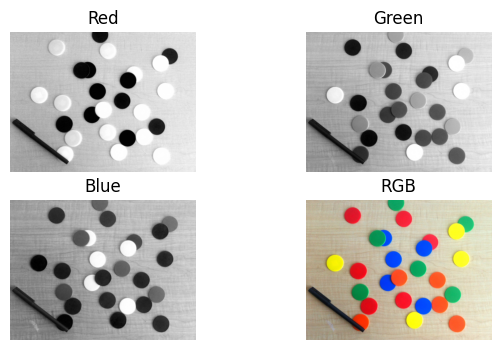

In [22]:
# show each channel individually
plt.figure(figsize = (7, 4))
plt.subplot(2, 2, 1)
plt.imshow(im_1_R, cmap='gray')
plt.title('Red')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(im_1_G, cmap='gray')
plt.title('Green')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im_1_B, cmap='gray')
plt.title('Blue')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(im_1_rgb)
plt.title('RGB')
plt.axis('off')
plt.show()

<b>Combinación de colores Red, Green, y Blue</b>

La figura muestra la combinación de los colores primarios (Rojo, Verde, Azul) en el espacio RGB y los distintos tonos generados.

<img src="color_combining.jpg" width="200">

Para unir los canales

In [23]:
im_1_merged = cv2.merge([im_1_B, im_1_G, im_1_R])

### 1.3.  Gráfico tridimensional del espacio de color RGB

Gráfico tridimensional de los píxeles de la imagen en el espacio RGB. Esta visualización permite observar la distribución de los tonos en un eje 3d.

In [24]:
def plot_rgb_color_space(im_bgr):
    # Convertir la imagen de BGR a RGB
    imagen_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

    # Separar los canales RGB utilizando cv2.split()
    R, G, B = cv2.split(imagen_rgb)

    # Aplanar los canales para obtener vectores unidimensionales
    R = R.flatten()
    G = G.flatten()
    B = B.flatten()

    # Crear una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar cada píxel en el espacio RGB
    ax.scatter(R, G, B, c=imagen_rgb.reshape(-1, 3)/255, marker='.', s=1)

    # Etiquetas de los ejes
    ax.set_xlabel('Rojo (R)')
    ax.set_ylabel('Verde (G)')
    ax.set_zlabel('Azul (B)')

    # Ajustar manualmente la vista
    ax.view_init(elev=40, azim=15)  # Cambia estos valores para rotar el gráfico

    # Mostrar el gráfico
    plt.show()

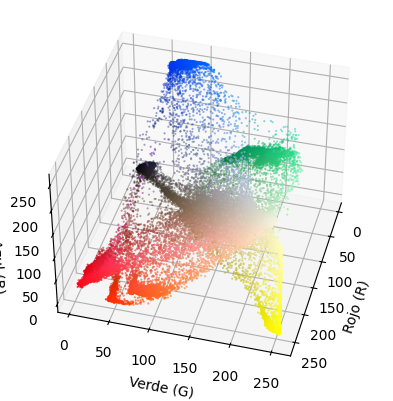

In [25]:
plot_rgb_color_space(im_1)

***

## Actividad

Genera un gráfico tridimensional del espacio de color RGB de una de las imágenes de color de la actividad anterior (hojas de uva).

In [26]:
# escriba aquí su código

***

## 2. Espacio de color HSV

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que separa la información cromática (tono) de la intensidad y la pureza del color. En OpenCV, este espacio se utiliza frecuentemente para tareas de procesamiento de imágenes donde es importante manipular los colores de manera independiente a su iluminación. HSV facilita operaciones como la detección de colores específicos y segmentación, ya que permite una representación más intuitiva de los colores comparada con el modelo RGB.

<img src="HSV_colorspace.jpg" width="350">

La imagen muestra una representación tridimensional del espacio de color HSV (Hue, Saturation, Value). El modelo se visualiza como un cilindro, donde:

- Hue (Tono): Representado en el borde exterior del cilindro, indica el color, variando de 0 a 360 grados, donde 0 es rojo, 120 es verde y 240 es azul.
- Saturation (Saturación): Representada en el eje radial, indica la pureza del color, con valores que van desde 0 (gris, sin color) en el centro hasta 1 (color más puro) en el borde exterior.
- Value (Valor o Brillo): Representado en el eje vertical del cilindro, indica la luminosidad del color, con valores que van desde 0 (negro) en la parte inferior hasta 1 (color más brillante) en la parte superior.

***

<img src="HSV_plane.png" width="350">

La imagen muestra una representación bidimensional de una sección del espacio de color HSV, donde se fija la saturación en su valor máximo $S_{HSV}=1$

- Eje horizontal (H): Representa el tono (Hue) variando de 0° a 360°. Este eje muestra la transición continua de colores, comenzando desde el rojo (0°), pasando por verde (120°), azul (240°), y volviendo al rojo (360°).
- Eje vertical (V): Representa el valor o brillo (Value), variando de 0 a 1. En la parte inferior del gráfico, donde V=0, todos los colores son negros, mientras que en la parte superior, donde V=1, los colores son más brillantes y saturados.

***

### 2.1. Conversión de formato BGR a HSV

In [27]:
im_1_HSV = cv2.cvtColor(im_1, cv2.COLOR_BGR2HSV)

Separación de canales HSV

In [28]:
(im_1_H, im_1_S, im_1_V) = cv2.split(im_1_HSV)

print(im_1_H)

[[19 18 19 ... 30 29 28]
 [15 17 19 ... 35 30 29]
 [15 16 18 ... 31 29 30]
 ...
 [19 19 20 ... 24 24 24]
 [21 21 21 ... 22 22 22]
 [22 21 19 ... 22 22 22]]


### 2.2. Visualización de los canales individuales

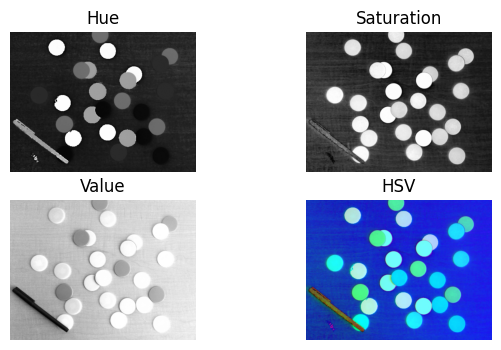

In [29]:
# show each channel individually
plt.figure(figsize = (7, 4))
plt.subplot(2, 2, 1)
plt.imshow(im_1_H, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(im_1_S, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im_1_V, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(im_1_HSV)
plt.title('HSV')
plt.axis('off')
plt.show()

### 2.3.  Gráfico tridimensional del espacio de color HSV

Gráfico tridimensional de los píxeles de la imagen en el espacio HSV. Esta visualización permite observar la distribución de los tonos en un eje 3d.

In [30]:
def plot_hsv_color_space(image_hsv):
    # Separar los canales RGB utilizando cv2.split()
    H, S, V = cv2.split(image_hsv)
    
    # Convertir los valores a un rango adecuado
    H = np.deg2rad(H.flatten())*2 # Convertir H de grados a radianes
    S = S.flatten() / 255.0  # Normalizar S a [0, 1]
    V = V.flatten() / 255.0  # Normalizar V a [0, 1]

    # Convertir coordenadas cilíndricas (H, S, V) a cartesianas (x, y, z)
    x = S * np.cos(H)
    y = S * np.sin(H)
    z = V

    # Crear figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar los puntos en el espacio 3D
    # Escalar el color de los puntos utilizando el espacio HSV normalizado
    colors = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB).reshape(-1, 3) / 255.0
    ax.scatter(x, y, z, c = colors, marker='.', s=1)

    # Etiquetas de los ejes
    ax.set_xlabel('X (S * cos(H))')
    ax.set_ylabel('Y (S * sin(H))')
    ax.set_zlabel('V (Value)')

    # Ajustar manualmente la vista
    ax.view_init(elev=90, azim=270)  # Cambia estos valores para rotar el gráfico
    
    # Mostrar el gráfico
    plt.show()

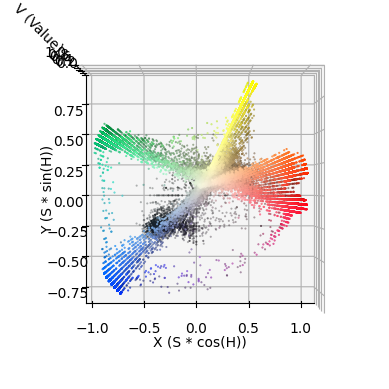

In [31]:
plot_hsv_color_space(im_1_HSV)

***

## Actividad

Genera un gráfico tridimensional del espacio de color HSV de una de las imágenes de color de la actividad anterior.

In [32]:
# escriba aquí su código

***

## 3. Espacio de color LAB

El espacio de color LAB es un modelo de color perceptualmente uniforme, diseñado para aproximar la visión del color humano. En este espacio, el canal **L** representa la luminosidad, mientras que los canales **A** y **B** contienen la información cromática, indicando los colores en los ejes verde-rojo y azul-amarillo, respectivamente. LAB es ampliamente utilizado en aplicaciones donde la percepción del color es necesaria, como en la corrección de color y la comparación de imágenes. 

<img src="lab_sphere.png" width="350">

### 3.1. Conversión de formato BGR a LAB

In [33]:
im_1_LAB = cv2.cvtColor(im_1, cv2.COLOR_BGR2LAB)

Separación de canales Lab

In [34]:
(im_1_L, im_1_A, im_1_B) = cv2.split(im_1_LAB)

### 3.2. Visualización de los canales individuales

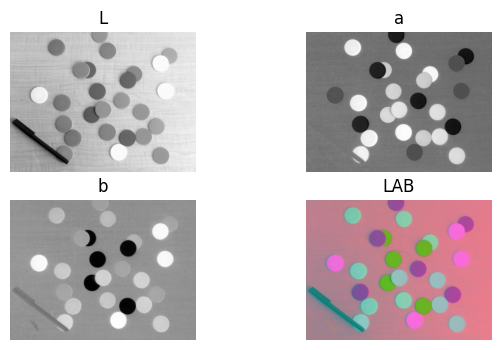

In [35]:
# show each channel individually
plt.figure(figsize = (7, 4))
plt.subplot(2, 2, 1)
plt.imshow(im_1_L, cmap='gray')
plt.title('L')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(im_1_A, cmap='gray')
plt.title('a')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im_1_B, cmap='gray')
plt.title('b')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(im_1_LAB)
plt.title('LAB')
plt.axis('off')
plt.show()

### 3.3.  Gráfico tridimensional del espacio de color LAB

Gráfico tridimensional de los píxeles de la imagen en el espacio LAB. Esta visualización permite observar la distribución de los tonos en un eje 3d.

In [36]:
def plot_lab_color_space(image_lab):
    # Separar los canales L, A y B
    L, A, B = cv2.split(image_lab)
    
    # Convertir A y B al rango [-128, 127]
    L = L.flatten()
    A = A.flatten()
    B = B.flatten()

    # Crear figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar los puntos en el espacio 3D
    # Escalar el color de los puntos utilizando el espacio HSV normalizado
    colors = cv2.cvtColor(image_lab, cv2.COLOR_LAB2RGB).reshape(-1, 3) / 255.0
    ax.scatter(A, B, L, c = colors, marker='.', s=1)

    # Etiquetas de los ejes
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('L')

    # Ajustar manualmente la vista
    ax.view_init(elev=45, azim=70)  # Cambia estos valores para rotar el gráfico
    
    # Mostrar el gráfico
    plt.show()

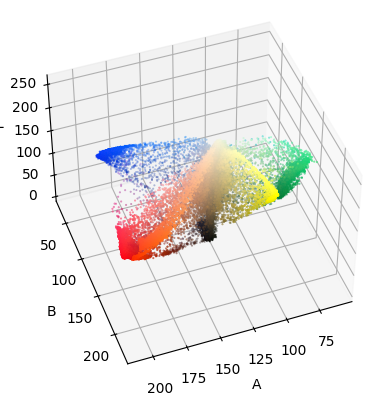

In [37]:
plot_lab_color_space(im_1_LAB)

***

## 4. Espacio de color Grayscale

El espacio de color Grayscale (escala de grises) es una representación en la que cada píxel de una imagen tiene un valor de luminancia, sin contener información cromática. Este valor varía desde el negro (0) hasta el blanco (255), pasando por diferentes tonos de gris. En OpenCV, la conversión de una imagen en color a escala de grises es una operación común, utilizada para simplificar el procesamiento de imágenes, como en la detección de bordes y el análisis de texturas. Trabajar en escala de grises reduce la complejidad computacional, permitiendo un análisis más eficiente en muchas aplicaciones de visión por computadora.

Las fórmulas para convertir una imagen en color al espacio de color Grayscale (escala de grises) se basan en una combinación ponderada de los canales de color (Rojo, Verde y Azul). La fórmula comúnmente utilizada es:

$$ gray = 0.299 \times R + 0.587 \times G + 0.114 \times B $$


Donde:

- **R** es la intensidad del canal rojo.
- **G** es la intensidad del canal verde.
- **B** es la intensidad del canal azul.

Estas ponderaciones se eligen porque reflejan la sensibilidad del ojo humano a los diferentes colores, siendo el verde el más perceptible, seguido del rojo y lueagen original.

### 4.1. Conversión de formato BGR a LAB

In [38]:
im_1_gray = cv2.cvtColor(im_1, cv2.COLOR_BGR2GRAY)

### 4.2. Visualización de los canales individuales

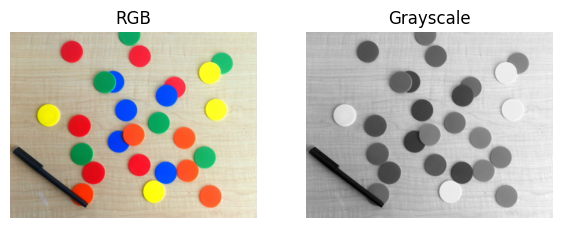

In [39]:
# show each channel individually
plt.figure(figsize = (7, 4))
plt.subplot(1, 2, 1)
plt.imshow(im_1_rgb)
plt.title('RGB')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_1_gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')
plt.show()